# Keras basic


In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
#convert the data into the format Keras / TensorFlow expects
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
#convert the 0-9 labels into "one-hot" format

train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


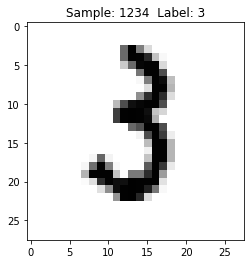

In [5]:
#display
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [6]:
#set up the same layers. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied.

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Setting up optimizer and loss function 

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
# model
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 5s - loss: 0.2382 - accuracy: 0.9305 - val_loss: 0.1321 - val_accuracy: 0.9584
Epoch 2/10
600/600 - 4s - loss: 0.0960 - accuracy: 0.9714 - val_loss: 0.0825 - val_accuracy: 0.9745
Epoch 3/10
600/600 - 4s - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0771 - val_accuracy: 0.9779
Epoch 4/10
600/600 - 4s - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 5/10
600/600 - 4s - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0661 - val_accuracy: 0.9812
Epoch 6/10
600/600 - 5s - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0730 - val_accuracy: 0.9785
Epoch 7/10
600/600 - 4s - loss: 0.0209 - accuracy: 0.9942 - val_loss: 0.0691 - val_accuracy: 0.9805
Epoch 8/10
600/600 - 4s - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0635 - val_accuracy: 0.9827
Epoch 9/10
600/600 - 4s - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0693 - val_accuracy: 0.9813
Epoch 10/10
600/600 - 4s - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0699 - val_accuracy: 0.9828

In [9]:
#accuracy
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06986691802740097
Test accuracy: 0.9828000068664551


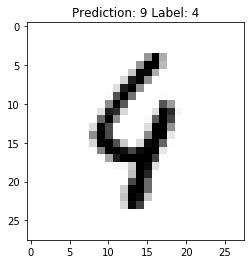

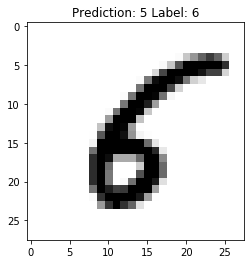

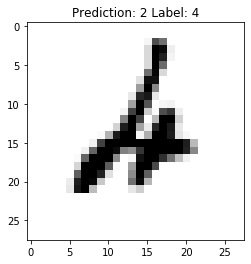

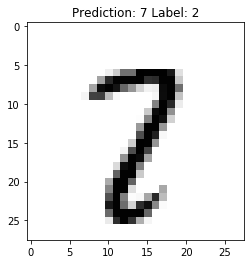

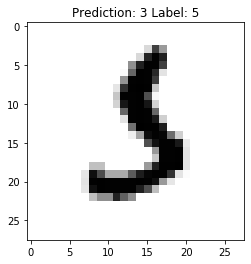

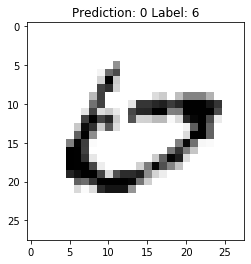

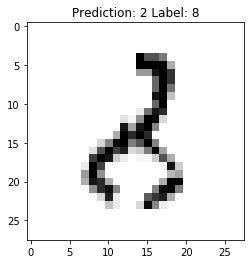

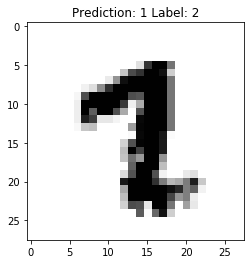

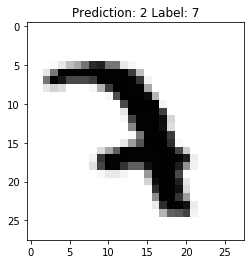

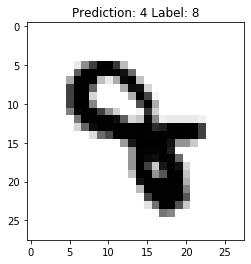

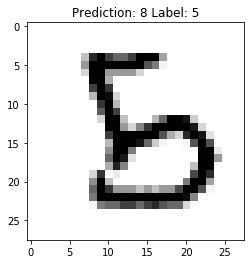

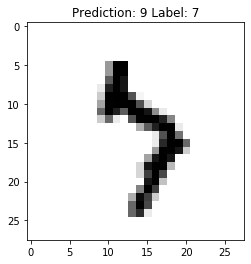

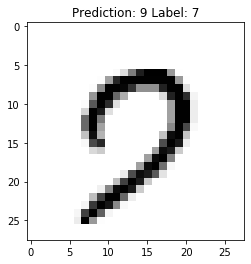

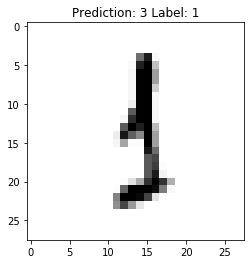

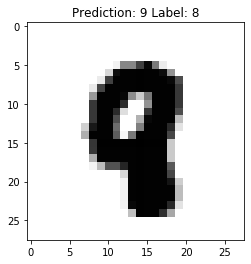

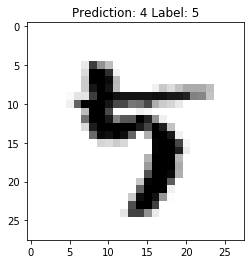

In [10]:
# check mistakes
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()